In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_table(df, column_name):
    """The function takes in a .csv file and returns a frequency table 
    with three columns – 
    Freq (Frequency), P (Proportion), and % (Percentage).
    """
    
    df = pd.read_csv(df)
    freq = pd.value_counts(df[column_name]) # get counts for each unique value
    # print(type(freq))
    counts = freq.to_frame() # convert a Series object to a dataframe
    counts.index.name = column_name # name the index column
    counts.columns = ['Freq'] # name the counts column

    # add the proportion and percentage columns
    counts['P'] = round(counts['Freq'] / counts['Freq'].sum(), 2) 
    counts['%'] = counts['P'] * 100

    counts.loc['Total'] = counts.sum(axis = 0) # add the Total row
    
    return counts

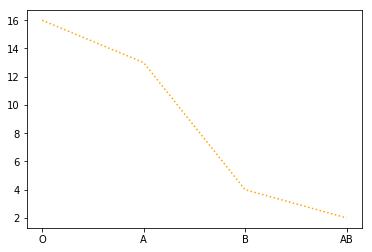

In [3]:
result = get_table('blood_types.csv', 'Blood Type')

plt.plot(result.loc['O':'AB', 'Freq'], ':', color = 'orange')
plt.show()

In [4]:
# highlight the Total row (the total values we get are correct)
result = result.style.apply(lambda x: ['background: lightgreen' if x.name == 'Total' else '' for i in x], axis = 1)
result

,Freq,P,%
Blood Type,,,
O,16,0.46,46
A,13,0.37,37
B,4,0.11,11
AB,2,0.06,6
Total,35,1,100
